In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
dir_path = r'C:\Users\Sudhakor Das\New'
test_path = 'New/testing'
CAT = ["Angry","Crying","Sad","Smile","Stressed"]

In [3]:
img_size = 200

In [4]:
training_data = []
def create_training_data():
    for category in CAT:
        path = os.path.join(dir_path, category) #Path to all the category
        class_num = CAT.index(category)
        
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Sudhakor Das\\New\\Angry'

In [15]:

import random

In [16]:
random.shuffle(training_data)

In [17]:
training_data

[[array([[[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [255, 254, 254],
          [255, 254, 254],
          [255, 254, 254]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [255, 254, 254],
          [255, 254, 254],
          [255, 254, 254]],
  
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [255, 254, 254],
          [255, 254, 254],
          [255, 254, 254]],
  
         ...,
  
         [[  1,  13,  15],
          [  1,  13,  15],
          [  1,  13,  15],
          ...,
          [233, 236, 234],
          [232, 235, 233],
          [232, 235, 233]],
  
         [[  1,  13,  15],
          [  1,  13,  15],
          [  1,  13,  15],
          ...,
          [232, 235, 233],
          [232, 235, 233],
          [232, 235, 233]],
  
         [[  1,  13,  15],
          [  1,  13,  15],
          [  1,  13,  15

In [18]:
for i in training_data[:10]:
    print(i[1])

4
4
3
3
1
1
3
2
1
3


In [19]:
x = []
y = []

In [20]:
for features,labels in training_data:
    x.append(features)
    y.append(labels)

In [21]:
x[0].shape

(200, 200, 3)

In [22]:
x = np.array(x).reshape(-1,img_size,img_size,3)
y = np.array(y)

In [23]:
len(y)

1240

In [24]:
len(x)

1240

In [25]:
import pickle

In [26]:
pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [27]:
x = pickle.load(open('x.pickle','rb'))
y = pickle.load(open('y.pickle','rb')) 

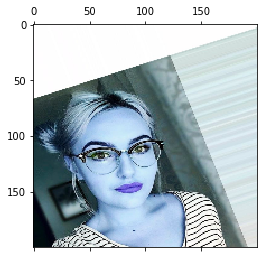

In [28]:
plt.matshow(x[0])

In [29]:
x = x/255

In [57]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Flatten())
model.add(Dense(32))
          
model.add(Dense(5))
model.add(Activation('sigmoid'))
          
          
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics  = ['accuracy'])          


In [59]:
model.fit(x,y, batch_size = 30, validation_split = .1,  epochs = 3)

Train on 1116 samples, validate on 124 samples
Epoch 1/3
1116/1116 [==============================] - 45s 41ms/sample - loss: 7.5198 - accuracy: 0.2858 - val_loss: 6.8179 - val_accuracy: 0.3226
Epoch 2/3
1116/1116 [==============================] - 43s 39ms/sample - loss: 4.0204 - accuracy: 0.3360 - val_loss: 1.3930 - val_accuracy: 0.5161
Epoch 3/3
1116/1116 [==============================] - 49s 44ms/sample - loss: 1.0597 - accuracy: 0.6102 - val_loss: 0.9101 - val_accuracy: 0.6774


In [33]:
testing_data = []
def create_testing_data():
    for category in CAT:
        path = os.path.join(test_path, category) #Path to all the category
        class_num = CAT.index(category)
        
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                n_array = cv2.resize(img_array, (img_size,img_size))
                testing_data.append([n_array, class_num])
            except Exception as e:
                pass
            
create_testing_data()

In [34]:
Ti = []
To = []


In [35]:
for features,labels in testing_data:
    Ti.append(features)
    To.append(labels)
    
 

In [36]:
Ti = np.array(Ti).reshape(-1,img_size,img_size,3)
To= np.array(To)

In [153]:
To[29]

0

In [60]:
val = model.predict(Ti)

In [137]:
x = val


In [146]:
n = len(val)
n

480

In [139]:
x[5]

array([1., 0., 0., 0., 0.], dtype=float32)

In [148]:
j = 0
for i  in range(0,480):
    
    j+= 1
    
    if x[i][0] == 1:
        print('Angry')

    if x[i][1] == 1:
        print('Crying')

    if x[i][2] == 1:
        print('Sad')

    if x[i][3] == 1:
        print('Smile')

    if x[i][4] == 1:
        print('Strssed')  
    
    if j>310:
        break


Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Sad
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Sad
Sad
Angry
Angry
Angry
Sad
Angry
Angry
Angry
Angry
Angry
